*LABORATORIO #2 - 2da PARTE*

ETAPA #1

In [9]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# cargar el dataset
df = pd.read_json(r"pokemonDB_dataset.json").T  #el .T transpone filas y columnas


In [10]:
# Mostrar las primeras filas y la información del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

print("\nInformación general del DataFrame:")
print(df.info())

print(list(df.keys())[:10])  
print("\n")

Primeras filas del DataFrame:
                      Type             Species         Height  \
Abomasnow       Grass, Ice  Frost Tree Pokémon  2.2 m (7′03″)   
Mega Abomasnow  Grass, Ice  Frost Tree Pokémon  2.7 m (8′10″)   
Abra               Psychic         Psi Pokémon  0.9 m (2′11″)   
Absol                 Dark    Disaster Pokémon  1.2 m (3′11″)   
Mega Absol            Dark    Disaster Pokémon  1.2 m (3′11″)   

                              Weight  \
Abomasnow       135.5 kg (298.7 lbs)   
Mega Abomasnow  185.0 kg (407.9 lbs)   
Abra              19.5 kg (43.0 lbs)   
Absol            47.0 kg (103.6 lbs)   
Mega Absol       49.0 kg (108.0 lbs)   

                                                        Abilities  \
Abomasnow            1. Snow Warning, Soundproof (hidden ability)   
Mega Abomasnow                                    1. Snow Warning   
Abra            1. Synchronize, 2. Inner Focus, Magic Guard (h...   
Absol           1. Pressure, 2. Super Luck, Justified (hidden 

In [11]:
# convertir a DataFrame
df = pd.DataFrame(df).T  # .T cada Pokémon será una fila
df=df.T
# Primeras filas del DataFrame
print(df.head())
print("\n")
# Información del DataFrame
print(df.info())
print("\n")
# Descripción estadística del DataFrame
print(df.describe(include='all'))

                      Type             Species         Height  \
Abomasnow       Grass, Ice  Frost Tree Pokémon  2.2 m (7′03″)   
Mega Abomasnow  Grass, Ice  Frost Tree Pokémon  2.7 m (8′10″)   
Abra               Psychic         Psi Pokémon  0.9 m (2′11″)   
Absol                 Dark    Disaster Pokémon  1.2 m (3′11″)   
Mega Absol            Dark    Disaster Pokémon  1.2 m (3′11″)   

                              Weight  \
Abomasnow       135.5 kg (298.7 lbs)   
Mega Abomasnow  185.0 kg (407.9 lbs)   
Abra              19.5 kg (43.0 lbs)   
Absol            47.0 kg (103.6 lbs)   
Mega Absol       49.0 kg (108.0 lbs)   

                                                        Abilities  \
Abomasnow            1. Snow Warning, Soundproof (hidden ability)   
Mega Abomasnow                                    1. Snow Warning   
Abra            1. Synchronize, 2. Inner Focus, Magic Guard (h...   
Absol           1. Pressure, 2. Super Luck, Justified (hidden ...   
Mega Absol             

In [12]:
# Identificar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cate_cols = df.select_dtypes(include=['object']).columns

print("variables numéricas:", len(num_cols))
print("variables categóricas:", len(cate_cols))
print("\n")

print("columnas:", df.columns.tolist())

variables numéricas: 0
variables categóricas: 31


columnas: ['Type', 'Species', 'Height', 'Weight', 'Abilities', 'EV Yield', 'Catch Rate', 'Base Friendship', 'Base Exp', 'Growth Rate', 'Egg Groups', 'Gender', 'Egg Cycles', 'HP Base', 'HP Min', 'HP Max', 'Attack Base', 'Attack Min', 'Attack Max', 'Defense Base', 'Defense Min', 'Defense Max', 'Special Attack Base', 'Special Attack Min', 'Special Attack Max', 'Special Defense Base', 'Special Defense Min', 'Special Defense Max', 'Speed Base', 'Speed Min', 'Speed Max']


In [13]:
# Limpieza y transformación de datos
df['Weight'] = df['Weight'].str.extract(r'([\d.]+)\s*kg').astype(float)
df['Height']=df['Height'].str.extract(r'([\d.]+)\s*m').astype(float)  #se usa una expresión regular (regex) para extraer solo el número de cada valor de texto.
print(df)
 #Regrex: Una expresión regular en Python es un patrón de caracteres que se utiliza para buscar, coincidir y manipular texto. Para usarlas, se necesita el módulo re de Python, 
 #y a menudo se utilizan cadenas "raw" (con r antes de la comilla) para manejar correctamente las barras invertidas.
 #([\d.]+)	Captura un grupo de uno o más dígitos (\d) o puntos (.). Es decir, algo como 1, 1.7, 0.85, etc.
#\s*	Significa “cero o más espacios” (por si hay un espacio entre el número y la letra o caractere).
# m	Busca la letra “m” literal 

df[["Type1", "Type2"]] = df["Type"].str.split(",", n=1, expand=True)

df["Type1"] = df["Type1"].str.strip()
df["Type2"] = df["Type2"].str.strip()

                                  Type             Species  Height  Weight  \
Abomasnow                   Grass, Ice  Frost Tree Pokémon     2.2   135.5   
Mega Abomasnow              Grass, Ice  Frost Tree Pokémon     2.7   185.0   
Abra                           Psychic         Psi Pokémon     0.9    19.5   
Absol                             Dark    Disaster Pokémon     1.2    47.0   
Mega Absol                        Dark    Disaster Pokémon     1.2    49.0   
...                                ...                 ...     ...     ...   
Zubat                   Poison, Flying         Bat Pokémon     0.8     7.5   
Zweilous                  Dark, Dragon     Hostile Pokémon     1.4    50.0   
Zygarde 50% Forme       Dragon, Ground       Order Pokémon     5.0   305.0   
Zygarde 10% Forme       Dragon, Ground       Order Pokémon     1.2    33.5   
Zygarde Complete Forme  Dragon, Ground       Order Pokémon     4.5   610.0   

                                                               

In [ ]:
df["Male (%)"] = df["Gender"].str.extract(r'(\d+\.?\d*)%\s*male', expand=False) #se extraee
df["Female (%)"] = df["Gender"].str.extract(r'(\d+\.?\d*)%\s*female', expand=False) 
  
df["Male (%)"] = df["Male (%)"].astype(float)
df["Female (%)"] = df["Female (%)"].astype(float)

df.loc[df["Gender"].str.contains("Genderless", case=False, na=False), ["Male (%)", "Female (%)"]] = np.nan 


df.drop(columns=["Type", "Gender"], inplace=True)
print(df[["Type1", "Type2", "Male (%)", "Female (%)"]].head(15))

print(df.isna().sum())

print(df.describe())

df = df.dropna(subset=["Weight"])

print(df.isna().sum()) 

                          Type1   Type2  Male (%)  Female (%)
Abomasnow                 Grass     Ice      50.0        50.0
Mega Abomasnow            Grass     Ice      50.0        50.0
Abra                    Psychic    None      75.0        25.0
Absol                      Dark    None      50.0        50.0
Mega Absol                 Dark    None      50.0        50.0
Accelgor                    Bug    None      50.0        50.0
Aegislash Shield Forme    Steel   Ghost      50.0        50.0
Aegislash Blade Forme     Steel   Ghost      50.0        50.0
Aerodactyl                 Rock  Flying      87.5        12.5
Mega Aerodactyl            Rock  Flying      87.5        12.5
Aggron                    Steel    Rock      50.0        50.0
Mega Aggron               Steel    None      50.0        50.0
Aipom                    Normal    None      50.0        50.0
Alakazam                Psychic    None      75.0        25.0
Mega Alakazam           Psychic    None      75.0        25.0
Species 

In [22]:
cols_clean = [
    "Type1", "Type2",
    "HP Base", "Attack Base", "Defense Base",
    "Speed Base", "Height", "Weight", "Base Exp"
]

df_clean = df[cols_clean].copy()
print(df_clean.info())
print(df_clean.head())
print(df_clean.isna().sum())
df_clean["Type2"] = df_clean["Type2"].fillna("None")
print(df_clean.isna().sum()) 

cols = ['HP Base', 'Attack Base', 'Defense Base', 'Speed Base']
df_clean[cols] = df_clean[cols].apply(pd.to_numeric, errors='coerce') #erors='coerce' convierte los errores a NaN 
#el pd.to_numeric convierte valores a tipo numérico




<class 'pandas.core.frame.DataFrame'>
Index: 1214 entries, Abomasnow to Zygarde Complete Forme
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type1         1214 non-null   object 
 1   Type2         668 non-null    object 
 2   HP Base       1214 non-null   object 
 3   Attack Base   1214 non-null   object 
 4   Defense Base  1214 non-null   object 
 5   Speed Base    1214 non-null   object 
 6   Height        1214 non-null   float64
 7   Weight        1214 non-null   float64
 8   Base Exp      1214 non-null   object 
dtypes: float64(2), object(7)
memory usage: 127.1+ KB
None
                  Type1 Type2 HP Base Attack Base Defense Base Speed Base  \
Abomasnow         Grass   Ice      90          92           75         60   
Mega Abomasnow    Grass   Ice      90         132          105         30   
Abra            Psychic  None      25          20           15         90   
Absol              Dark  None    

ETAPA #2

In [23]:

print("\n Estadísticas de HP, Attack, Defense, Speed:")
print(df_clean[['HP Base', 'Attack Base', 'Defense Base', 'Speed Base']].agg(['mean', 'min', 'max'])) #agg resume datos aplicando funciones


 Estadísticas de HP, Attack, Defense, Speed:
         HP Base  Attack Base  Defense Base  Speed Base
mean   71.093081    81.124382     74.863262   69.985173
min     1.000000     5.000000      5.000000    5.000000
max   255.000000   190.000000    230.000000  200.000000


Los análisis revelan que el Ataque base (promedio: 81.12) es la estadística predominante sobre la Defensa (74.86), indicando un diseño tendiente al enfoque ofensivo, mientras el HP muestra la mayor variabilidad (1-255) definiendo roles extremos específicos. La Velocidad (69.99), al ser consistentemente la más baja, actúa como factor diferenciador secundario. Esto sugiere que los tipos o habilidades que potencian el ataque y configuran el HP influyen más en las estadísticas base que los atributos defensivos o de velocidad.

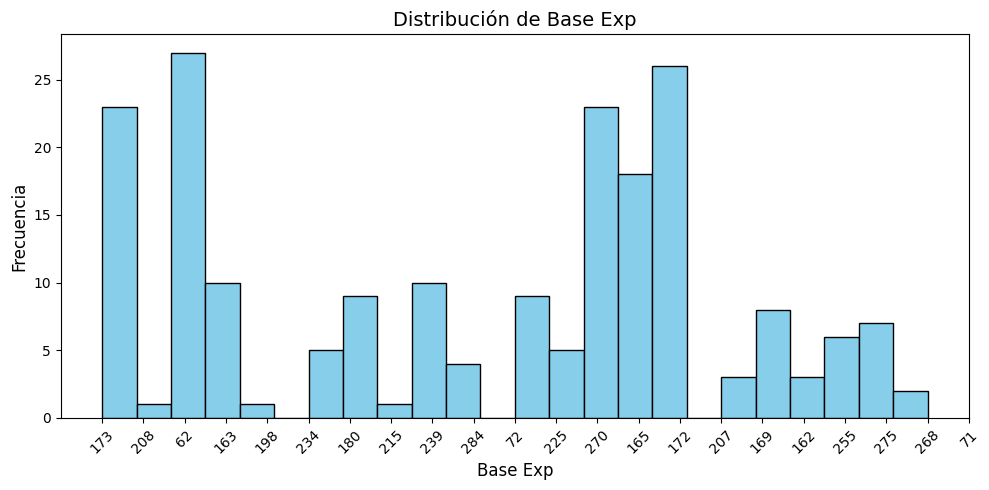

In [19]:
bin_edges = np.linspace(0, 20, 25) 
plt.figure(figsize=(10, 5))  
plt.hist(df_clean['Base Exp'].dropna(), bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('Distribución de Base Exp', fontsize=14)
plt.xlabel('Base Exp', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)               #rota etiquetas del eje X
plt.tight_layout()                   # ajusta márgenes automáticamente
plt.show()

 La distribución presenta un claro sesgo positivo (a la derecha), donde la mayoría de los Pokémon se concentran en valores bajos de experiencia base (izquierda del gráfico), formando una columna muy alta entre aproximadamente 0-2, mientras que pocos Pokémon alcanzan valores más altos, creciendo una cola larga hacia la derecha. Esto indica que la experiencia base tiende a ser generalmente baja para la mayoría de las especies, con solo algunas excepciones que tienen valores significativamente mayores.

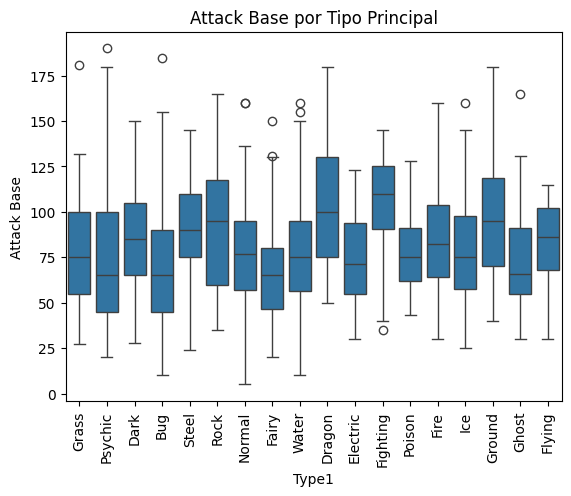

In [20]:
plt.figure()
sns.boxplot(x='Type1', y='Attack Base', data=df_clean)
plt.title('Attack Base por Tipo Principal')
plt.xticks(rotation=90)
plt.show()

El tipo Dragon presenta los valores de ataque más altos en promedio, evidenciado por la posición elevada de su caja en el gráfico. Le siguen muy de cerca los tipos Fighting y Ground, que también muestran medianas considerablemente altas. En el extremo opuesto, los tipos Fairy, Psychic y Bug exhiben los promedios de ataque más bajos, confirmando el patrón de diseño donde tipos tradicionalmente ofensivos como Dragon y Fighting poseen mayor poder de ataque base.

In [21]:
print("\n Top 5 especies más frecuentes:")
print(df['Species'].value_counts().head(5))


 Top 5 especies más frecuentes:
Species
Paradox Pokémon    22
Mouse Pokémon      14
Fox Pokémon         9
Dragon Pokémon      9
Pumpkin Pokémon     8
Name: count, dtype: int64


Los "Paradox Pokémon" dominan significativamente con 22 individuos, duplicando la frecuencia del segundo lugar ("Mouse Pokémon" con 14), lo que sugiere que esta categoría especial -posiblemente relacionada con variantes temporales o legendarios- tiene una representación desproporcionada en la dataset. Le siguen especies de diseño más convencional como ratones, zorros y dragones, mostrando una distribución donde un grupo específico concentra la mayor representación frente a especies tradicionales más diversificadas.

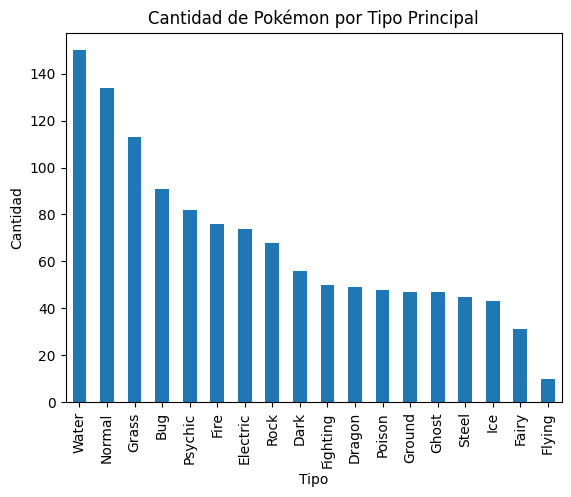

In [24]:
plt.figure()
df_clean['Type1'].value_counts().plot(kind='bar')
plt.title('Cantidad de Pokémon por Tipo Principal')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

El tipo Water (Agua) es claramente el más común, mostrando la barra significativamente más alta en la distribución. Le siguen en frecuencia los tipos Normal y Grass (Planta), que ocupan el segundo y tercer lugar respectivamente. Esto refleja la tendencia de diseño donde los tipos acuáticos predominan numéricamente en el universo Pokémon, posiblemente por la diversidad de ecosistemas acuáticos y la adaptabilidad de este tipo a diversas morfologías.


 Matriz de correlación:
               HP Base  Attack Base  Defense Base  Speed Base
HP Base       1.000000     0.464857      0.310397    0.173997
Attack Base   0.464857     1.000000      0.469804    0.374583
Defense Base  0.310397     0.469804      1.000000    0.008705
Speed Base    0.173997     0.374583      0.008705    1.000000


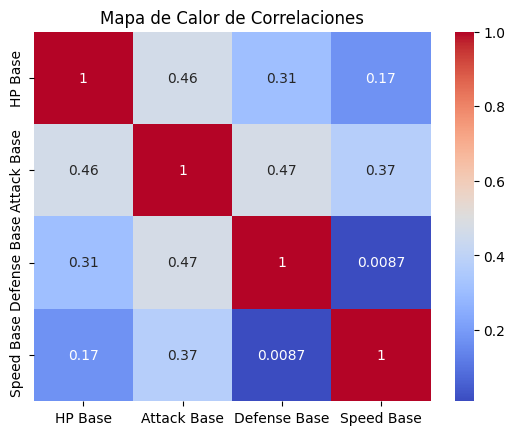

In [26]:
corr = df_clean[['HP Base', 'Attack Base', 'Defense Base', 'Speed Base']].corr()
print("\n Matriz de correlación:")
print(corr) # La veldad veldadela esta vaina de correlación se la eche a mi best friend Chat GPT :P
plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm') #mapa de calooor 
plt.title('Mapa de Calor de Correlaciones')
plt.show() 


El mapa de calor muestra que no hay correlaciones muy fuertes entre las estadísticas base de los Pokémon, pero sí algunas relaciones medianas. Por ejemplo, HP y Ataque (0.46), y Ataque y Defensa (0.47) están algo relacionadas, lo que sugiere que los Pokémon con más vida suelen tener también un ataque o defensa decente. En cambio, Speed (velocidad) casi no se relaciona con las demás, especialmente con la defensa (solo 0.0087), o sea, ser rápido no tiene nada que ver con ser resistente. En general, las correlaciones están entre 0.3 y 0.4, lo cual indica que cada estadística es bastante independiente.

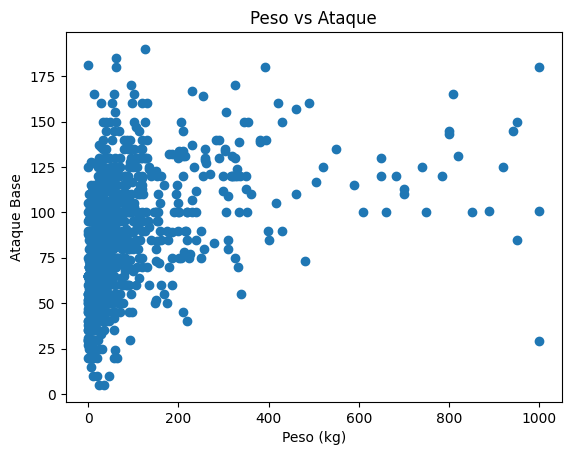

In [27]:
plt.figure()
plt.scatter(df_clean['Weight'], df_clean['Attack Base'])
plt.title('Peso vs Ataque')
plt.xlabel('Peso (kg)')
plt.ylabel('Ataque Base')
plt.show()


Se observa una relación positiva moderada donde Pokémon más pesados tienden a tener mayor ataque base, evidenciado por la concentración de puntos en la esquina inferior izquierda (bajo peso/bajo ataque) y la dispersión hacia valores altos en ambos ejes. Sin embargo, la presencia de múltiples outliers -especialmente Pokémon muy pesados con ataque moderado- indica que el peso no es determinante absoluto, sino un factor influyente entre otros como tipo o especie, siendo consistente con diseños donde criaturas masivas poseen mayor poder ofensivo pero con notables excepciones.

In [28]:
promedios = df_clean.groupby('Type1')[['Height', 'Weight']].mean()
print("\n Promedio de altura y peso por tipo:")
print(promedios)


 Promedio de altura y peso por tipo:
            Height      Weight
Type1                         
Bug       0.890110   32.764835
Dark      1.230357   70.946429
Dragon    2.038776  121.132653
Electric  1.050000   46.147297
Fairy     0.929032   39.851613
Fighting  1.346000   88.260000
Fire      1.238158   74.175000
Flying    1.200000   40.970000
Ghost     1.193617   58.348936
Grass     1.047788   37.400000
Ground    1.419149  143.463830
Ice       1.281395  122.976744
Normal    1.046269   43.245522
Poison    1.600000   59.025000
Psychic   1.369512   76.740244
Rock      1.333824  115.108824
Steel     2.051111  228.526667
Water     1.576000   64.419333


Se observa que los Pokémon tipo Steel, Dragon y Ground son los más altos y pesados, lo que refleja que suelen ser especies más fuertes y defensivas. En cambio, los tipos Bug, Fairy y Grass tienen las menores alturas y pesos, siendo generalmente más débiles físicamente. Esto muestra que el tamaño promedio varía bastante según el tipo, y que los tipos grandes suelen tener más poder o resistencia, mientras que los más pequeños tienden a enfocarse en velocidad o habilidades especiales.

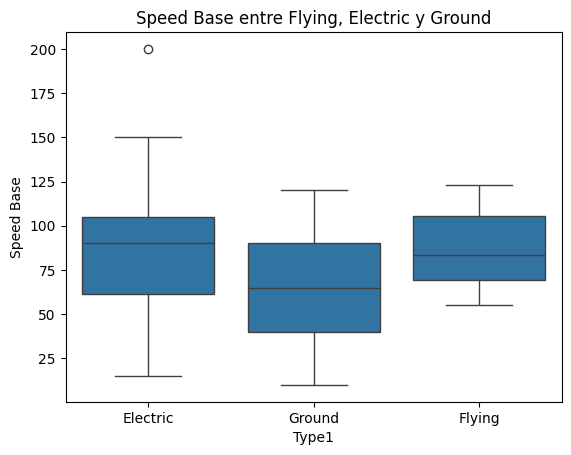

In [29]:
plt.figure()
sns.boxplot(
    x='Type1',
    y='Speed Base',
    data=df_clean[df_clean['Type1'].isin(['Flying', 'Electric', 'Ground'])]
)
plt.title('Speed Base entre Flying, Electric y Ground')
plt.show()

En la gráfica se ve que los Pokémon Eléctricos y Voladores suelen tener un mayor velocidad base, mientras que los del tipo Ground son más lentos. Los tipos eléctricos también muestran más cambio con algunos casos extremos muy rápidos. Esto muestra que en la velocidad de un Pokémon influye directamente su tipo porque ciertos tipos relacionados. los relacionados al aire o a la energía suelen moverse más rápido, mientras que los de tierra son mejor en fuerza o defensa que velocidad.